In [56]:
#Better
!pip install requests BeautifulSoup4 fire

In [57]:
from requests import get
from requests.exceptions import RequestException
from contextlib import closing
from bs4 import BeautifulSoup
import pandas as pd
import os, sys

import fire

In [58]:
#%%writefile ../pyscrap_url.py

def simple_get(url):
    """
    Attempts to get the content at `url` by making an HTTP GET request.
    If the content-type of response is some kind of HTML/XML, return the
    text content, otherwise return None.
    """
    try:
        with closing(get(url, stream=True)) as resp:
            if is_good_response(resp):
                return resp.content  #.encode(BeautifulSoup.original_encoding)
            else:
                return None

    except RequestException as e:
        log_error('Error during requests to {0} : {1}'.format(url, str(e)))
        return None


def is_good_response(resp):
    """
    Returns True if the response seems to be HTML, False otherwise.
    """
    content_type = resp.headers['Content-Type'].lower()
    return (resp.status_code == 200 
            and content_type is not None 
            and content_type.find('html') > -1)


def log_error(e):
    """
    It is always a good idea to log errors. 
    This function just prints them, but you can
    make it do anything.
    """
    print(e)
    
def get_elements(url, tag='',search={}, fname=None):
    """
    Downloads a page specified by the url parameter
    and returns a list of strings, one per tag element
    """
    
    if isinstance(url,str):
        response = simple_get(url)
    else:
        #if already it is a loaded html page
        response = url

    if response is not None:
        html = BeautifulSoup(response, 'html.parser')
        
        res = []
        if tag:    
            for li in html.select(tag):
                for name in li.text.split('\n'):
                    if len(name) > 0:
                        res.append(name.strip())
                       
                
        if search:
            soup = html            
            
            
            r = ''
            if 'find' in search.keys():
                print('findaing',search['find'])
                soup = soup.find(**search['find'])
                r = soup

                
            if 'find_all' in search.keys():
                print('findaing all of',search['find_all'])
                r = soup.find_all(**search['find_all'])
   
            if r:
                for x in list(r):
                    if len(x) > 0:
                        res.extend(x)
            
        return res

    # Raise an exception if we failed to get any data from the url
    raise Exception('Error retrieving contents at {}'.format(url))    
    
def get_element(url, tag='',search={}, fname=None):
    """
    Downloads a page specified by the url parameter
    and returns a list of strings, one per tag element
    """
    if isinstance(url,str):
        response = simple_get(url)
    else:
        #if already it is a loaded html page
        response = url
    if response is not None:
        html = BeautifulSoup(response, 'html.parser')
        res = []
        if tag:    
            for li in html.select(tag):
                for name in li.text.split('\n'):
                    if len(name) > 0:
                        res.append(name.strip())
        if search:
            soup = html            
            r = ''
            if 'find' in search.keys():
                print('findaing',search['find'])
                soup = soup.find(**search['find'])
                r = soup
            if 'find_all' in search.keys():
                print('findaing all of',search['find_all'])
                r = soup.find_all(**search['find_all'])
            if r:
                for x in list(r):
                    if len(x) > 0:
                        res.extend(x)
        return res
    # Raise an exception if we failed to get any data from the url
    raise Exception('Error retrieving contents at {}'.format(url))    
    
    
if get_ipython().__class__.__name__ == '__main__':
    fire(get_tag_elements)

##### Web scrape 100 most influential Twitter users in Africa using Python or Bash to obtain the 100 African twitter influencers. This website uses three key metrics to find the top 100 influencers a. Popularity (Retweet Influence): measured by the number of Retweets and Likes users get b. Reach (Indegree Influence): measured by the size of their audience c. Relevance (Mentions Influence): measured by the relevancy of their content 


In [59]:
res = get_elements('https://africafreak.com/100-most-influential-twitter-users-in-africa',tag='h2')
res

['100. Jeffrey Gettleman (@gettleman)',
 '99. Africa24 Media (@a24media)',
 '98. Scapegoat (@andiMakinana)',
 '97. Africa Check (@AfricaCheck)',
 '96. James Copnall (@JamesCopnall)',
 '95. Online Africa (@oafrica)',
 '94. Patrick Ngowi (@PatrickNgowi)',
 '93. DOS African Affairs (@StateAfrica)',
 '92. MoadowAJE (@Moadow)',
 '91. Brendan Boyle (@BrendanSAfrica)',
 '90. City of Tshwane (@CityTshwane)',
 '89. VISI Magazine (@VISI_Mag)',
 '88. andBeyond (@andBeyondSafari)',
 '87. This Is Africa (@ThisIsAfricaTIA)',
 '86. Sarah Carter (@sarzss)',
 '85. The EIU Africa team (@TheEIU_Africa)',
 '84. Investing In Africa (@InvestInAfrica)',
 '83. Barry Malone (@malonebarry)',
 '82. ARTsouthAFRICA (@artsouthafrica)',
 '81. Kahn Morbee (@KahnMorbee)',
 '80. Jamal Osman (@JamalMOsman)',
 '79. iamsuede™ (@iamsuede)',
 '78. Mike Stopforth (@mikestopforth)',
 '77. Equal Education (@equal_education)',
 '76. Tristan McConnell (@t_mcconnell)',
 '75. Kate Forbes (@forbeesta)',
 '74. Vanessa Raphaely (@hur

##### I extracted the twitter handles for the 100 Non-Government Influentials.

In [60]:
non_govt_influencers = res
non_govt_influencers[:5]
non_govt_influencers = pd.Series(non_govt_influencers)
user_twitter_handle = [i.split('(')[-1].strip(')') for i in non_govt_influencers]

for i in user_twitter_handle[100:]:
    user_twitter_handle.remove(i)
user_twitter_handle

['@gettleman',
 '@a24media',
 '@andiMakinana',
 '@AfricaCheck',
 '@JamesCopnall',
 '@oafrica',
 '@PatrickNgowi',
 '@StateAfrica',
 '@Moadow',
 '@BrendanSAfrica',
 '@CityTshwane',
 '@VISI_Mag',
 '@andBeyondSafari',
 '@ThisIsAfricaTIA',
 '@sarzss',
 '@TheEIU_Africa',
 '@InvestInAfrica',
 '@malonebarry',
 '@artsouthafrica',
 '@KahnMorbee',
 '@JamalMOsman',
 '@iamsuede',
 '@mikestopforth',
 '@equal_education',
 '@t_mcconnell',
 '@forbeesta',
 '@hurricanevaness',
 '@BBCKarenAllen',
 '@jaxpanik',
 '@thisisafrica',
 '@audisouthafrica',
 '@ONEinAfrica',
 '@Hamza_Africa',
 '@drewfhinshaw',
 '@africatechie',
 '@cx73',
 '@ayittey',
 '@MercedesBenz_SA',
 '@africagathering',
 '@okayafrica',
 '@mary_harper',
 '@savetherhino',
 '@africamedia_CPJ',
 '@TechCentral',
 '@GautengProvince',
 '@Aynte',
 '@daniel_howden',
 '@rangerdiaries',
 '@TheStar_news',
 '@schneiderhome',
 '@Afrinnovator',
 '@theafricareport',
 '@CityofJoburgZA',
 '@ThinkAfricaFeed',
 '@AfricaGoodNews',
 '@willintune',
 '@cnbcafrica',
 

Saved my NonGovernment Influentials Handles to a dataframe then to a csv File

---


In [61]:
from pandas import DataFrame
df_handles_nongovInfluencers = DataFrame (user_twitter_handle,columns=['Handles of Non-Government Officials'])
sorted_NonGov_Handles = df_handles_nongovInfluencers.sort_values('Handles of Non-Government Officials',ascending=False)
sorted_NonGov_Handles.to_csv(r'handles_NonGovs.csv', index=False)

##### I queried twitter to get the tweets of the Non-Government Influentials gotten above.

In [62]:
import tweepy
import csv

consumer_key = "YNkViscToXknwxdHZlMet5ttL"
consumer_secret = "CLYR7a7heJmDxdYL8ndSWy8iBjrzT7o6uosWCOw5PegqRpXLCo"
access_token = "1246485711282462722-K6XVehSuGcLOhykJAh5o08t9Gjj91f"
access_token_secret = "2ylVw2VqkhwmwhBnPWaZEl891FBzefDPokKcBpP6fj7uT"

# Creating the authentication object
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# Setting your access token and secret
auth.set_access_token(access_token, access_token_secret)
# Creating the API object while passing in auth information
api = tweepy.API(auth) 

In [63]:
Tweets_NonGov_Influentials = []
    
for x in range(0, len(user_twitter_handle)):

    # The Twitter user who we want to get tweets from
    name = user_twitter_handle[x]
    try:
      # Calling the user_timeline function with our parameters
      results = api.user_timeline(id=name, count=10)

      # foreach through all tweets pulled
      for tweet in results:
      # printing the text stored inside the tweet object
          Tweets_NonGov_Influentials.append(tweet.text)
    except tweepy.TweepError as e:
        continue

from pandas import DataFrame
df_tweets_nongovInfluencers = DataFrame(Tweets_NonGov_Influentials, columns=['Tweets of Non-Government Influentials'])
df_tweets_nongovInfluencers.to_csv(r'tweets_NonGovs.csv', index=False)

##### I saved the tweets of the Non-government Influentials gotten above to a dataframe

#####  By analysing their followers count, number of likes, number of retweets, number of people they follow, number of tweets they shared, score each of the influencers and top government officials as follows: 
a. popularity_score = #retweets + #likes 

b. reach_score = #followers - #they follow 

c. relevance_score = #comments + #mentions in other tweets 


##### Analysing for Non-Government Influencers to get the followers count, likes count, following count, tweets count for each user

In [ ]:
screenname_NonGov_Influentials = []
no_ofLikes_NonGov_Influentials = []
no_ofFollowing_NonGov_Influentials = []
no_ofTweetsCount_NonGov_Influentials = []
no_ofFollowers_NonGov_Influentials = []

for x in range(0, len(user_twitter_handle)):
    
    name = user_twitter_handle[x]
    try:
        # Calling the user_timeline function with our parameters
        results = api.get_user(id=name)
        screenname_NonGov_Influentials.append(results.screen_name)
        no_ofFollowers_NonGov_Influentials.append(results.followers_count)
        no_ofLikes_NonGov_Influentials.append(results.favourites_count)
        no_ofFollowing_NonGov_Influentials.append(results.friends_count)
        no_ofTweetsCount_NonGov_Influentials.append(results.statuses_count)
    except tweepy.TweepError as e:
        continue

from pandas import DataFrame
df_scrrenname_nongovInfluencers = DataFrame(screenname_NonGov_Influentials,columns=['Screen Name for Social Media Influentials'])
df_followerscount_nongovInfluencers = DataFrame(no_ofFollowers_NonGov_Influentials,columns=['No Of Followers for Social Media Influentials'])
df_likescount_nongovInfluencers = DataFrame(no_ofLikes_NonGov_Influentials,columns=['No Of Likes for Social Media Influentials'])
df_followingcount_nongovInfluencers = DataFrame(no_ofFollowing_NonGov_Influentials,columns=['No Of Following for Social Media Influentials'])
df_tweetscount_nongovInfluencers = DataFrame(no_ofTweetsCount_NonGov_Influentials,columns=['No Of Tweets Shared for Social Media Influentials'])

concatenated_list = pd.concat([df_scrrenname_nongovInfluencers, df_followerscount_nongovInfluencers,df_likescount_nongovInfluencers, df_followingcount_nongovInfluencers, df_tweetscount_nongovInfluencers], axis=1)
concatenated_list

,Screen Name for Social Media Influentials,No Of Followers for Social Media Influentials,No Of Likes for Social Media Influentials,No Of Following for Social Media Influentials,No Of Tweets Shared for Social Media Influentials
0,gettleman,25713,10,37,3777
1,a24media,31272,1654,3060,16879
2,AndiMakinana,101560,9046,2845,142438
3,AfricaCheck,68137,3914,4590,27390
4,JamesCopnall,21996,3631,5056,19451
...,...,...,...,...,...
87,Julius_S_Malema,3142172,4710,650,37375
88,News24,3589105,1146,632,323912
89,SAPresident,18,65,14,19
90,GarethCliff,1975499,34026,358,31641


In [ ]:
no_ofRetweets_NonGov_Influentials = []      

#get no of retweets for each user
for x in range(0, len(user_twitter_handle)):
    name = user_twitter_handle[x]
    try:
       for status in tweepy.Cursor(api.user_timeline, id=name).items(100):
          if hasattr(status, "entities"):
            entities = status.entities

          #get number of retweets
          if hasattr(status, "retweet_count"):
            retweets = status.retweet_count
            if retweets is not None:
              no_ofRetweets_NonGov_Influentials.append(retweets)
    except tweepy.TweepError as e:
        continue
        print(no_ofRetweets_NonGov_Influentials)
        
from pandas import DataFrame
df_retweetcount_nongovInfluencers = DataFrame (no_ofRetweets_NonGov_Influentials,columns=['No Of Retweets of Non-Government Influentials'])

#get no of mentionss for each user
for x in range(0, len(user_twitter_handle)):
    name = user_twitter_handle[x]
    noOfMentions_NonGov_Influentials = []
    try:
        for status in tweepy.Cursor(api.user_timeline, id=name,count=1).items():
            if hasattr(status, "entities"):
                entities = status.entities
                if "user_mentions" in entities:
                    for ent in entities["user_mentions"]:
                        if ent is not None:
                            if "screen_name" in ent:
                                name = ent["screen_name"]
                                if name is not None:
                                    noOfMentions_NonGov_Influentials.append(name)
    except tweepy.TweepError as e:
        continue

In [ ]:
no_ofRetweets_NonGov_Influentials = []     
popularityscores_NonGov_Influentials = []
reachscores_NonGov_Influentials = []
noOfMentions_NonGov_Influentials = []

#get number of retweets for each Non Government Influencer
for x in range(0, len(user_twitter_handle)):
    name = user_twitter_handle[x]
    try:
      Retweet_count = 0
      for status in tweepy.Cursor(api.user_timeline,id=name).items():
        Retweet_count += status.retweet_count
      no_ofRetweets_NonGov_Influentials.append(Retweet_count)
    except tweepy.TweepError as e:
        continue

#get popularity scores for each Non Government Influencer
#for i in range(0, len(no_ofRetweets_Gov_Influentials)):
#   popularity_score_gov = no_ofRetweets_Gov_Influentials[i] + no_ofLikes_Gov_Influentials[i]
#   popularityscores_Gov_Influentials.append(popularity_score_gov)

#get reach scores for each Non Government Influencer
for i in range(0, len(no_ofFollowers_NonGov_Influentials)):
    reachscore_NonGov = no_ofFollowers_NonGov_Influentials[i] - no_ofFollowing_NonGov_Influentials[i]
    reachscores_NonGov_Influentials.append(reachscore_NonGov)

from pandas import DataFrame
#i used only number of likes to get popularity scores instead of number_of_likes + number_of_retweets because i tried but to no avail, i couldn't get the number of retweets_count
#i used only number of mebtions to get relevance scores instead of number_of_mentions + number_of_comments because i tried but to no avail, i couldn't get the number of number_of_comments
df_popularityscores_NonGov_Influencers = DataFrame (no_ofLikes_NonGov_Influentials,columns=['Popularity Scores for Social Media Influentials'])
df_popularityscores_NonGov_Influencers.sort_values(by=['Popularity Scores for Social Media Influentials'], inplace=True, ascending=False)
df_reachscores_NonGov_Influencers = DataFrame (reachscores_NonGov_Influentials,columns=['Reach Scores for Social Media Influentials'])
df_reachscores_NonGov_Influencers.sort_values(by=['Reach Scores for Social Media Influentials'], inplace=True, ascending=False)

#### I arranged the list of social media influencers based on their Reach Scores, Trevornoah had the highest Reach Scores with 10825323

In [64]:
concatenated_list = pd.concat([df_scrrenname_nongovInfluencers, df_popularityscores_NonGov_Influencers,df_reachscores_NonGov_Influencers], axis=1)
concatenated_list.sort_values(by=['Reach Scores for Social Media Influentials'], ascending=False).head(10)

,Screen Name for Social Media Influentials,Popularity Scores for Social Media Influentials,Reach Scores for Social Media Influentials
91,Trevornoah,1715,10825323
88,News24,1146,3588450
87,Julius_S_Malema,4710,3141492
90,GarethCliff,34026,1975138
78,euphonik,2577,1759844
86,helenzille,1783,1441863
81,MTVBaseAfrica,2038,1417918
84,5FM,8785,1164621
80,OfficialCSA,10355,1158762
54,MbuyiseniNdlozi,5393,1087952


#### I arranged the list of social media influencers based on their Popularity Scores, UlrichJvV had the highest Popularity Scores with 347850

In [65]:
concatenated_list2 = pd.concat([df_scrrenname_nongovInfluencers, df_popularityscores_NonGov_Influencers,df_reachscores_NonGov_Influencers], axis=1)
concatenated_list2.sort_values(by=['Popularity Scores for Social Media Influentials'], ascending=False).head(10)

,Screen Name for Social Media Influentials,Popularity Scores for Social Media Influentials,Reach Scores for Social Media Influentials
79,UlrichJvV,347850,512254
29,africatechie,137678,104640
16,malonebarry,45484,25622
46,CityofJoburgZA,34068,942004
90,GarethCliff,34026,1975138
26,audisouthafrica,23652,214748
21,mikestopforth,18169,20557
74,SamsungSA,17922,572390
36,savetherhino,17389,79429
73,liveamp,16665,938411


### Webscraped the Government officials

In [66]:
url= 'https://www.atlanticcouncil.org/blogs/africasource/african-leaders-respond-to-coronavirus-on-twitter/#east-africa'
response = get(url).content
res_gov = get_elements(response, tag='blockquote')
gov_officials_twitter_handles = []
for r in res_gov:
    split_data = r.split('— ',maxsplit=1)[1].rsplit('(',maxsplit=1)
    name = split_data[0].split(',')[0].strip()
    handle =  split_data[1].rsplit(')',maxsplit=1)[0]
    gov_officials_twitter_handles.append(handle)
    print(f'{name} : {handle}')

Eswatini Government : @EswatiniGovern1
Malawi Government : @MalawiGovt
Hage G. Geingob : @hagegeingob
Seychelles Ministry of Finance : @FinanceSC
PresidencyZA : @PresidencyZA
Ministry of Health Zambia : @mohzambia
President of Zimbabwe : @edmnangagwa
MinSantédj : @MinSantedj
Yemane G. Meskel : @hawelti
State House Kenya : @StateHouseKenya
Paul Kagame : @PaulKagame
Mohamed Farmaajo : @M_Farmaajo
H.E Hussein Abdelbagi Akol : @SouthSudanGov
Abdalla Hamdok : @SudanPMHamdok
TanzaniaSpokesperson : @TZSpokesperson
Yoweri K Museveni : @KagutaMuseveni
MOFA/MRE -(Angola) : @angola_Mirex
Amb. Willy Nyamitwe : @willynyamitwe
Chérif Mahamat Zene : @Cherif_MZ
Présidence RDC 🇨🇩 : @Presidence_RDC
Ali Bongo Ondimba : @PresidentABO
Présidence du Bénin : @PresidenceBenin
Roch KABORE : @rochkaborepf
Presidente Cabo Verde : @PresidenciaCV
Alassane Ouattara : @AOuattara_PRCI
State House of The Gambia : @Presidency_GMB
Nana Akufo-Addo : @NAkufoAddo
Pr. Alpha CONDÉ : @President_GN
Umaro Sissoco Embalo : @USEm

#### I Extracted the government officials handles only and saved to a csv file

In [67]:
from pandas import DataFrame
df_handles_govInfluencers = DataFrame (gov_officials_twitter_handles,columns=['Handles of Government Officials'])
sorted_Gov_Handles = df_handles_govInfluencers.sort_values('Handles of Government Officials',ascending=False)
sorted_Gov_Handles.to_csv(r'handles_Govs.csv', index=False)

In [68]:
import tweepy
import csv

consumer_key = "YNkViscToXknwxdHZlMet5ttL"
consumer_secret = "CLYR7a7heJmDxdYL8ndSWy8iBjrzT7o6uosWCOw5PegqRpXLCo"
access_token = "1246485711282462722-K6XVehSuGcLOhykJAh5o08t9Gjj91f"
access_token_secret = "2ylVw2VqkhwmwhBnPWaZEl891FBzefDPokKcBpP6fj7uT"

# Creating the authentication object
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# Setting your access token and secret
auth.set_access_token(access_token, access_token_secret)
# Creating the API object while passing in auth information
api = tweepy.API(auth) 

In [ ]:
Tweets_Gov_Officials = []
    
for x in range(0, len(gov_officials_twitter_handles)):

    # The Twitter user who we want to get tweets from
    name = gov_officials_twitter_handles[x]

    # Calling the user_timeline function with our parameters
    results = api.user_timeline(id=name)

    # foreach through all tweets pulled
    for tweet in results:
    # printing the text stored inside the tweet object
        Tweets_Gov_Officials.append(tweet.text)

from pandas import DataFrame
df_tweets_govInfluencers = DataFrame (Tweets_Gov_Officials,columns=['Tweets of Government Officials'])
df_tweets_govInfluencers.to_csv(r'tweets_Govs.csv', index=False)

##### Analysing for Government Influencers to get the followers count, likes count, following count, tweets count for each user

In [ ]:
screenname_Gov_Influentials = []
no_ofLikes_Gov_Influentials = []
no_ofFollowing_Gov_Influentials = []
no_ofTweetsCount_Gov_Influentials = []
no_ofFollowers_Gov_Influentials = []
no_ofRetweets_Gov_Influentials = []     
popularityscores_Gov_Influentials = []
reachscores_Gov_Influentials = []

for x in range(0, len(gov_officials_twitter_handles)):
    
    # The Twitter user who we want to get followers count for
    name = gov_officials_twitter_handles[x]
    try:
        # Calling the user_timeline function with our parameters
        results = api.get_user(id=name)
        screenname_Gov_Influentials.append(results.screen_name)
        no_ofFollowers_Gov_Influentials.append(results.followers_count)
        no_ofLikes_Gov_Influentials.append(results.favourites_count)
        no_ofFollowing_Gov_Influentials.append(results.friends_count)
        no_ofTweetsCount_Gov_Influentials.append(results.statuses_count)
    except tweepy.TweepError as e:
        continue

from pandas import DataFrame
df_screenname_govInfluencers = DataFrame(screenname_Gov_Influentials,columns=['Screen Name of Government Influentials'])
df_followerscount_govInfluencers = DataFrame(no_ofFollowers_Gov_Influentials,columns=['No Of Followers of Government Influentials'])
df_likescount_govInfluencers = DataFrame(no_ofLikes_Gov_Influentials,columns=['No Of Likes of Government Influentials'])
df_followingcount_govInfluencers = DataFrame(no_ofFollowing_Gov_Influentials,columns=['No Of Following for Government Influentials'])
df_tweetscount_govInfluencers = DataFrame(no_ofTweetsCount_Gov_Influentials,columns=['No Of Tweets Shared for Government Influentials'])

concatenated_list = pd.concat([df_screenname_govInfluencers, df_followerscount_govInfluencers,df_likescount_govInfluencers, df_followingcount_govInfluencers, df_tweetscount_govInfluencers], axis=1)
concatenated_list

,Screen Name of Government Influentials,No Of Followers of Government Influentials,No Of Likes of Government Influentials,No Of Following for Government Influentials,No Of Tweets Shared for Government Influentials
0,EswatiniGovern1,11510,65,83,1724
1,MalawiGovt,39763,915,26,4038
2,hagegeingob,194022,268,55,1105
3,FinanceSC,129,12,224,130
4,PresidencyZA,1608772,64,14,19024
5,mohzambia,7332,163,95,842
6,edmnangagwa,550603,65,116,629
7,MinSantedj,2972,597,129,1080
8,hawelti,67175,741,439,4731
9,StateHouseKenya,1109748,61,214,9067


##### To get number of retweets, popularity scores, reach scores and relevance scores for each user that is a Government Official

In [ ]:
no_ofRetweets_Gov_Influentials = []     
popularityscores_Gov_Influentials = []
reachscores_Gov_Influentials = []
noOfMentions_Gov_Influentials = []

#get number of retweets for each Government Influencer
for x in range(0, len(gov_officials_twitter_handles)):
    name = gov_officials_twitter_handles[x]
    try:
      Retweet_count = 0
      for status in tweepy.Cursor(api.user_timeline,id=name).items():
        Retweet_count += status.retweet_count
      no_ofRetweets_Gov_Influentials.append(Retweet_count)
    except tweepy.TweepError as e:
        continue

#get popularity scores for each Government Influencer
for i in range(0, len(no_ofRetweets_Gov_Influentials)):
    popularity_score_gov = no_ofRetweets_Gov_Influentials[i] + no_ofLikes_Gov_Influentials[i]
    popularityscores_Gov_Influentials.append(popularity_score_gov)

#get reach scores for each Government Influencer
for i in range(0, len(no_ofFollowers_Gov_Influentials)):
    reachscore_gov = no_ofFollowers_Gov_Influentials[i] - no_ofFollowing_Gov_Influentials[i]
    reachscores_Gov_Influentials.append(reachscore_gov)

from pandas import DataFrame
#i used only number of likes to get popularity scores instead of number_of_likes + number_of_retweets because i tried but to no avail, i couldn't figure out hoe to get the number of retweets pre tweets
df_popularityscores_Gov_Influencers = DataFrame (no_ofLikes_Gov_Influentials,columns=['Popularity Scores for Government Influencers'])
df_reachscores_Gov_Influencers = DataFrame (reachscores_Gov_Influentials,columns=['Reach Scores for Government Influencers'])

#### I arranged the list of government influencers based on their Reach Scores, MBuhari had the highest Reach Score with 3293118

In [69]:
concatenated_list_gov = pd.concat([df_screenname_govInfluencers, df_popularityscores_Gov_Influencers,df_reachscores_Gov_Influencers], axis=1)
concatenated_list_gov.sort_values(by=['Reach Scores for Government Influencers'], ascending=False).head(10)

,Screen Name of Government Influentials,Popularity Scores for Government Influencers,Reach Scores for Government Influencers
32,MBuhari,8,3293118
10,PaulKagame,620,1999399
15,KagutaMuseveni,75,1828923
4,PresidencyZA,64,1608754
26,NAkufoAddo,135,1520839
33,Macky_Sall,530,1383676
9,StateHouseKenya,61,1109491
24,AOuattara_PRCI,4,841749
6,edmnangagwa,65,550456
11,M_Farmaajo,22,429337


#### I arranged the list of government influencers based on their Popularity Scores, willynyamitwe had the highest Popularity Score with 6270

In [70]:
concatenated_list_gov2 = pd.concat([df_screenname_govInfluencers, df_popularityscores_Gov_Influencers,df_reachscores_Gov_Influencers], axis=1)
concatenated_list_gov2.sort_values(by=['Popularity Scores for Government Influencers'], ascending=False).head(10)

,Screen Name of Government Influentials,Popularity Scores for Government Influencers,Reach Scores for Government Influencers
17,willynyamitwe,6270,103077
28,USEmbalo,6063,8331
29,PresidenceMali,1732,229427
1,MalawiGovt,915,39735
8,hawelti,741,66731
10,PaulKagame,620,1999399
7,MinSantedj,597,2843
33,Macky_Sall,530,1383676
18,Cherif_MZ,484,19088
22,rochkaborepf,480,258017


##### Extract the top 5 unique hashtags these influencers and government officials used in their top 10 retweets. Group them based on their top 5 hashtags similarities. 

In [ ]:
combined_list = user_twitter_handle + gov_officials_twitter_handles

hashtags=[]
if len(combined_list) > 0:
    for handle in combined_list:
        value_list = {}
        #print("Getting hashtags for " + handle)
        # this helps avoid Tweepy errors like suspended users or user not found errors
        try:
            for status in tweepy.Cursor(api.user_timeline, id=handle).items():
                if hasattr(status, "entities"):
                    entities = status.entities
                    if 'hashtags' in entities:
                        for ent in entities['hashtags']:
                            if ent is not None:
                                if "text" in ent:
                                    hashtag = ent["text"]
                                    if hashtag is not None:
                                        hashtags.append(hashtag)
        except tweepy.TweepError as e:
            continue

### convert all hashtags generated above to lowercase

In [ ]:
#convert all hashtags to lowercase
hashtag = [item.lower() for item in hashtags]
print(hashtag)
from pandas import DataFrame
df = DataFrame (hashtag,columns=['Hashtag'])
df.to_csv(r'C:\Users\Tijesunimi2-PC\Downloads\hashtag_influentials.csv', index = False)

### change "coronavirus" and "covidlockdown" to mean "covid19" since the three words mean the same thing

In [ ]:
for n, i in enumerate(hashtag):
  if i == "covidlockdown":
    hashtag[n] = "covid19"

for n, i in enumerate(hashtag):
  if i == "coronavirus":
    hashtag[n] = "covid19"
  
for n, i in enumerate(hashtag):
  if i == "covid_19":
    hashtag[n] = "covid19"

In [ ]:
from collections import Counter
print(Counter(hashtag))

Counter({'africa': 371, 'covid19': 250, 'sudan': 227, 'kenya': 221, 'southafrica': 206, 'southsudan': 198, 'nigeria': 185, 'sudanuprising': 120, 'newsday': 116, 'unpackafricaonyebo': 79, 'african': 63, 'sa': 58, 'quoteoftheday': 49, 'rohingya': 43, 'africajournal': 42, 'yebowatchparty': 41, '1streads': 41, 'southafrican': 40, 'infofinder': 40, 'factchecking': 37, 'ethiopia': 36, 'nigerian': 34, 'factcheck': 33, 'thescoop': 30, 'yebo': 29, 'rwanda': 29, 'uganda': 28, 'tanzania': 27, 'ghana': 27, 'keepthefactsgoing': 23, 'misinformation': 23, 'agriculture': 21, 'tbt': 21, 'ict4d': 21, 'nairobi': 20, 'kenyan': 20, 'drc': 20, 'factchecks': 20, 'bbcnewsday': 20, 'photography': 19, 'yieldwise': 19, 'zimbabwe': 19, 'khartoum': 19, 'election2017': 19, 'health': 18, 'didyouknow': 18, 'factcheckers': 18, 'election': 18, 'somalia': 17, 'africaday': 17, 'hiv': 17, 'egypt': 17, 'internet': 17, 'education': 15, 'nigerians': 15, 'ict': 15, 'india': 14, 'myanmar': 14, 'algeria': 14, 'internationalwome

Make a bar plot to show the fraction of influencers and top government officials by 
hashtag


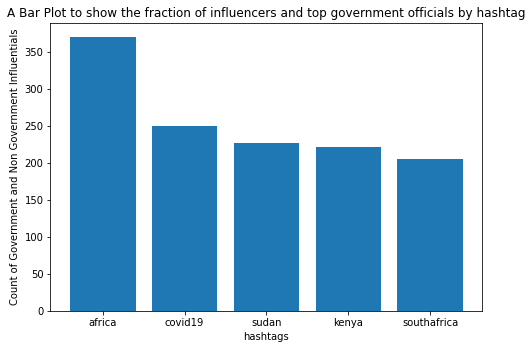

In [71]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
hashtag = ['africa', 'covid19', 'sudan', 'kenya', 'southafrica']
#Top 5 hashtags based on frequency counts
#Counter({'africa': 371, 'covid19': 250, 'sudan': 227, 'kenya': 221, 'southafrica': 206)
governmenInfluencers = [371,250,227,221,206]
ax.bar(hashtag,governmenInfluencers)
plt.xlabel("hashtags")
plt.ylabel("Count of Government and Non Government Influentials")
plt.title("A Bar Plot to show the fraction of influencers and top government officials by hashtag")
plt.show()